<a href="https://colab.research.google.com/github/Rahulmaurya1234/salary-prediction/blob/main/salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score
import joblib



In [2]:
df = pd.read_csv("salary.csv")
print(df.to_string)

<bound method DataFrame.to_string of       work_year experience_level employment_type                 job_title  \
0          2023               SE              FT  Principal Data Scientist   
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
3          2023               SE              FT            Data Scientist   
4          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   
3754       2021               SE              FT      Data Science Manager   

       salary salary_curre

In [3]:
print(df.describe())

         work_year        salary  salary_in_usd  remote_ratio
count  3755.000000  3.755000e+03    3755.000000   3755.000000
mean   2022.373635  1.906956e+05  137570.389880     46.271638
std       0.691448  6.716765e+05   63055.625278     48.589050
min    2020.000000  6.000000e+03    5132.000000      0.000000
25%    2022.000000  1.000000e+05   95000.000000      0.000000
50%    2022.000000  1.380000e+05  135000.000000      0.000000
75%    2023.000000  1.800000e+05  175000.000000    100.000000
max    2023.000000  3.040000e+07  450000.000000    100.000000


In [4]:
drop_cols = ["salary", "salary_currency", "salary_in_usd"]
X = df.drop(columns=drop_cols)
y = df["salary_in_usd"]

In [5]:
print("Preview of feature set (X):")
print(X.head())
print(y.head(5))

Preview of feature set (X):
   work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

  employee_residence  remote_ratio company_location company_size  
0                 ES           100               ES            L  
1                 US           100               US            S  
2                 US           100               US            S  
3                 CA           100               CA            M  
4                 CA           100               CA            M  
0     85847
1     30000
2     25500
3    175000
4    120000
Name: salary_in_usd, dtype: int64


In [6]:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()

In [7]:
print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

Categorical columns: ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']
Numerical columns: ['work_year', 'remote_ratio']


In [8]:
preprocessor = ColumnTransformer(
    transformers=[
        (
            "Rahul",
            OneHotEncoder(handle_unknown='ignore', sparse_output=False),
            categorical_cols
        )
    ],
    remainder='passthrough'
)

In [9]:
model = Pipeline([
    ("preprocessor", preprocessor),                     # Step 1: apply ColumnTransformer
    ("regressor", RandomForestRegressor(
        n_estimators=100,                                 # Number of trees in the forest
        random_state=42                                    # Seed for reproducibility
    ))
])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,                                       # 20% of data used for testing
    random_state=42                                      # Seed so results are reproducible
)


In [11]:
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Rahul',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['experience_level',
                                                   'employment_type',
                                                   'job_title',
                                                   'employee_residence',
                                                   'company_location',
                                                   'company_size'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [12]:
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Absolute Error: 36416.16
R^2 Score: 0.40


In [13]:
joblib.dump(model, 'rf_salary_model.pkl')
print("Model saved as 'rf_salary_model.pkl'")


Model saved as 'rf_salary_model.pkl'


In [14]:
new_candidate = {
    'work_year': 2024,
    'experience_level': 'SE',
    'employment_type': 'FT',
    'job_title': 'Data Scientist',
    'employee_residence': 'US',
    'remote_ratio': 100,
    'company_location': 'US',
    'company_size': 'M'
}

In [15]:
print(df.describe())

         work_year        salary  salary_in_usd  remote_ratio
count  3755.000000  3.755000e+03    3755.000000   3755.000000
mean   2022.373635  1.906956e+05  137570.389880     46.271638
std       0.691448  6.716765e+05   63055.625278     48.589050
min    2020.000000  6.000000e+03    5132.000000      0.000000
25%    2022.000000  1.000000e+05   95000.000000      0.000000
50%    2022.000000  1.380000e+05  135000.000000      0.000000
75%    2023.000000  1.800000e+05  175000.000000    100.000000
max    2023.000000  3.040000e+07  450000.000000    100.000000


In [16]:
new_df = pd.DataFrame([new_candidate])
loaded_model = joblib.load('rf_salary_model.pkl')
predicted_salary = loaded_model.predict(new_df)
print(f"Predicted Salary: {predicted_salary[0]:.2f}")


Predicted Salary: 175782.94


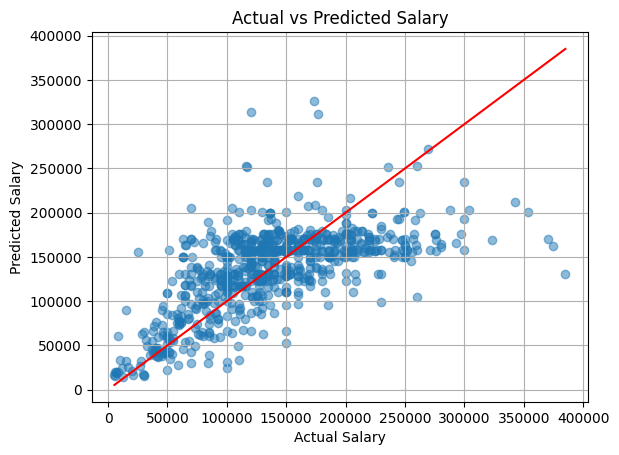

In [17]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # perfect line
plt.grid(True)
plt.show()
